






# Final Report - Data Science
## Bachelor's Degree in Computer Science / PUCPR
**Prof. Rayson Laroca**

`Júlia Cristina Moreira da Silva` - `s.moreira4@pucpr.edu.br`

`Guilherme Schwarz` - `guilherme.schwarz@pucpr.edu.br`

`Renan Belem Biavati` - `renan.belem@pucpr.edu.br`

`Matheus Francisco Trevisan Del Zotto` - `Matheus.del@pucpr.edu.br`


`2025`

# Import the libs you need

In [27]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.dates as mdates
from datetime import date
from sklearn.decomposition import PCA




# Load your data

Below, load the data using pandas and perform all necessary data cleansing to ensure that the data types are correct for further analysis.

In [2]:
dataset_url = 'https://github.com/juliamoreira/data-science/raw/main/startupSuccessPrediction/startup%20data.csv'
df = pd.read_csv(dataset_url)
df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
# clean and treat the data here

df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [4]:
df.shape

(923, 49)

In [5]:
#counting null values in each column
df.isna().sum()


,0
Unnamed: 0,0
state_code,0
latitude,0
longitude,0
zip_code,0
id,0
city,0
Unnamed: 6,493
name,0
labels,0


In [6]:

#taking off unused columns
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)
df.drop("state_code.1",  axis=1, inplace=True)

df.head()



,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [7]:
#Feature engineering: creating a new column to make a particular category to technology startups
category_codes = df['category_code'].dropna().unique()

tech_categories = [ 'biotech','web', 'software', 'games_video', 'network_hosting', 'mobile', 'security', 'hardware', 'analytics', 'search', 'semiconductor', 'social', 'messaging']
df['is_technology'] = df['category_code'].apply(lambda x: 1 if x in tech_categories else 0)

# and another one to set the age it closed
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')

# Calcular a idade da startup no fechamento (em anos)
df['age_at_closing'] = (df['closed_at'] - df['founded_at']).dt.days / 365.25


# Statistical Description

In this section, you should report the key characteristics of the dataset, including but not limited to:
* Number of instances;
* Number of features;
* Number of classes;
* Class distribution.

In [8]:
instances_number = df.shape[0]
features_number = df.shape[1]
classes_number = df['status'].nunique()

print(f"Number of instances: {instances_number}")
print(f"Number of features: {features_number}")
print(f"Number of classes: {classes_number}")

Number of instances: 923
Number of features: 48
Number of classes: 2


<ipython-input-9-2270395064>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='status', palette='pink')


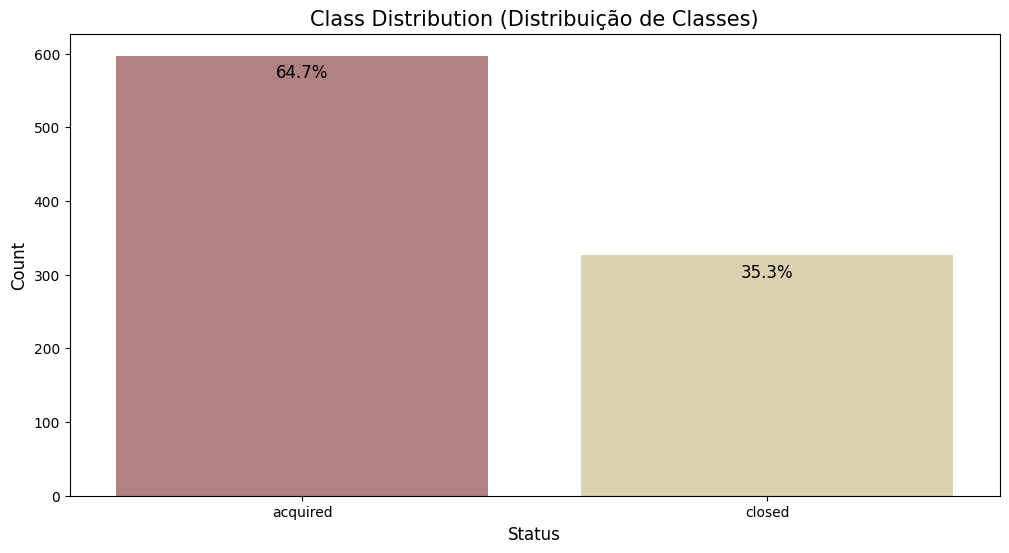

In [9]:
# Plot a graph bar showing the class distribuition
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='status', palette='pink')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / instances_number) * 100
    ax.text(p.get_x() + p.get_width() / 2, height -30, f'{percentage:.1f}%', ha='center', fontsize=12)

plt.title('Class Distribution (Distribuição de Classes)', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Univariate data analysis

In this section, you should perform univariate data analysis on at least **20 variables**.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (Gaussian, binomial, exponential, etc.);
2. Skewness;
3. Kurtosis;
4. Mean, standard deviation, and what they stand for in the context of the dataset.

Ensure that each variable is **plotted correctly** based on its type. For instance, make sure scatterplots are not used for categorical data and so forth.

## Defining each function that is required

In [10]:

def interpret_skewness(skew):
    if skew > 1:
        return "Highly skewed to the right"
    elif skew < -1:
        return "Highly skewed to the left"
    else:
        return "Approximately symmetric"


def interpret_kurtosis(kurt_value):
    if kurt_value > 3:
        return "Leptokurtic (heavy tails)"
    elif kurt_value < 3:
        return "Platykurtic (light tails)"
    else:
        return "Mesokurtic (normal distribution)"


def analyze_numerical(column_name):
    print(f"Analysis for Numerical Column: {column_name}")

    # Plotting histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column_name], kde=True, color='#1f77b4', bins=30)
    plt.title(f"Distribution of {column_name}", fontsize=15)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Calculating statistical measures
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    skewness_value = skew(df[column_name].dropna())
    kurtosis_value = kurtosis(df[column_name].dropna())

    print(f"Statistics for {column_name}:")
    print(f"Mean: {mean}, Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness_value}, Kurtosis: {kurtosis_value}")
    print(f"Interpretation:\n- Skewness: {interpret_skewness(skewness_value)}\n- Kurtosis: {interpret_kurtosis(kurtosis_value)}\n")

def analyze_date(column_name):
    print(f"Analysis for Date Column: {column_name}")

    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

    # Plottin using year
    df[column_name].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color=sns.color_palette("pastel", n_colors=3))
    plt.title(f"Distribution of {column_name} by Year", fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

    print(f"Frequency Distribution of {column_name} by Year:\n{df[column_name].dt.year.value_counts().sort_index()}\n")

     # Calculating statistical measures
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    skewness_value = skew(df[column_name].dropna())
    kurtosis_value = kurtosis(df[column_name].dropna())

    print(f"Statistics for {column_name}:")
    print(f"Mean: {mean}, Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness_value}, Kurtosis: {kurtosis_value}")
    print(f"Interpretation:\n- Skewness: {interpret_skewness(skewness_value)}\n- Kurtosis: {interpret_kurtosis(kurtosis_value)}\n")



def analyze_categorical(column_name):
    print(f"Analysis for Categorical Column: {column_name}")

    #Plotting
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column_name,  palette='pastel', hue=column_name, order=df[column_name].value_counts().index)
    plt.title(f"Distribution of {column_name}", fontsize=15)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    print(f"Frequency Distribution of {column_name}:\n{df[column_name].value_counts(normalize=True)}\n")

     # Calculating statistical measures
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    skewness_value = skew(df[column_name].dropna())
    kurtosis_value = kurtosis(df[column_name].dropna())

    print(f"Statistics for {column_name}:")
    print(f"Mean: {mean}, Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness_value}, Kurtosis: {kurtosis_value}")
    print(f"Interpretation:\n- Skewness: {interpret_skewness(skewness_value)}\n- Kurtosis: {interpret_kurtosis(kurtosis_value)}\n")





## Choosen columns and its analysis

In [11]:
categorical_columns= ['is_otherstate', 'is_technology', 'category_code', 'has_VC', 'has_angel', 'has_roundD', 'has_roundC', 'status', 'is_top500', 'state_code', 'is_CA', 'is_NY',  'is_MA',  'is_TX'] # 11 vars
date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'] # 4 vars
numerical_columns = [ 'age_at_closing','age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year',
                    'relationships', 'funding_rounds', 'funding_total_usd', 'milestones'] # 8 vars

# Columns textual description

## Categorical
is_otherstate: A binary variable indicating whether the startup is located in any state other than California, New York, Massachusetts, or Texas (1 = Yes, 0 = No).

is_technology: A binary indicator of whether the startup operates in the technology sector (1 = Yes, 0 = No) (feature_engineering).

category_code: A categorical variable representing the primary industry or category of the startup (e.g., software, biotech, ecommerce).

has_VC: A binary variable indicating whether the startup has received venture capital funding (1 = Yes, 0 = No).

has_angel: A binary variable indicating whether the startup has received angel investment (1 = Yes, 0 = No).

has_roundD: A binary variable indicating if the startup has undergone a Series D funding round (1 = Yes, 0 = No).

has_roundC: A binary variable indicating if the startup has undergone a Series C funding round (1 = Yes, 0 = No).

status: The final status of the startup, typically categorized as acquired or closed.

is_top500: A binary variable denoting whether the startup is ranked among the top 500 startups (1 = Yes, 0 = No).

state_code: The two-letter code representing the U.S. state in which the startup is located.

is_CA: A binary indicator for whether the startup is located in California (1 = Yes, 0 = No).

is_NY: A binary indicator for whether the startup is located in New York (1 = Yes, 0 = No).

is_MA: A binary indicator for whether the startup is located in Massachusetts (1 = Yes, 0 = No).

is_TX: A binary indicator for whether the startup is located in Texas (1 = Yes, 0 = No).

##Date Variables
founded_at: The date on which the startup was founded.

closed_at: The date when the startup ceased operations or was shut down (if applicable).

first_funding_at: The date when the startup received its first funding.

last_funding_at: The date when the startup received its most recent funding.

##Numerical Variables
age_at_closing: The age of the startup (in years) at the time it closed. (feature_engineering)

age_first_funding_year: The age (in years) of the startup when it received its first funding.

age_last_funding_year: The age (in years) of the startup when it received its last funding.

age_first_milestone_year: The startup’s age when it achieved its first milestone.

age_last_milestone_year: The startup’s age when it achieved its last milestone.

relationships: The number of business or professional relationships the startup has built.

funding_rounds: The total number of funding rounds the startup has participated in.

funding_total_usd: The total amount of funding received by the startup, measured in U.S. dollars.

milestones: The total number of major milestones the startup has achieved over time.

### Categorical Columns Analysys

In [12]:
#for col in categorical_columns:
 #   analyze_categorical(col)

### Numerical Columns Analysys

Analysis for Numerical Column: age_at_closing


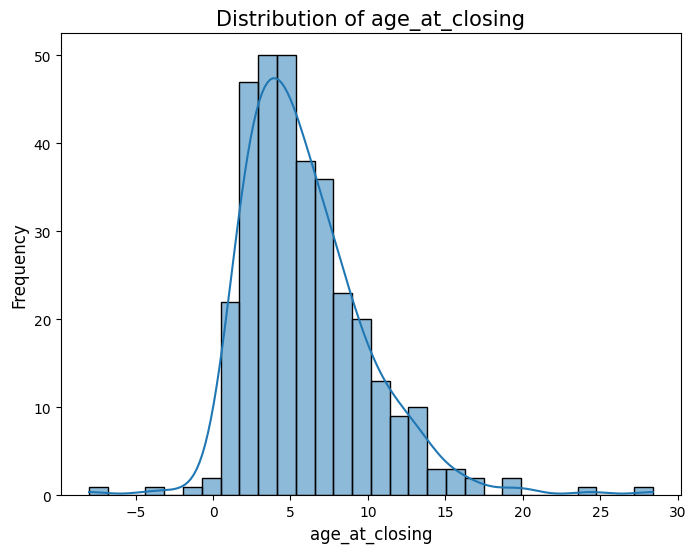

Statistics for age_at_closing:
Mean: 5.957399859021116, Standard Deviation: 4.044002114304716
Skewness: 1.2926340604343938, Kurtosis: 4.148934539563725
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: age_first_funding_year


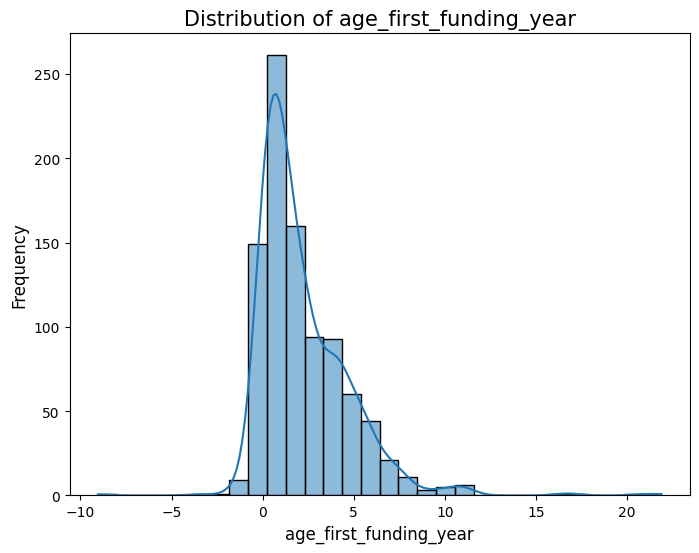

Statistics for age_first_funding_year:
Mean: 2.235630010834236, Standard Deviation: 2.5104485395130225
Skewness: 2.1005798811612877, Kurtosis: 9.999746122465806
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: age_last_funding_year


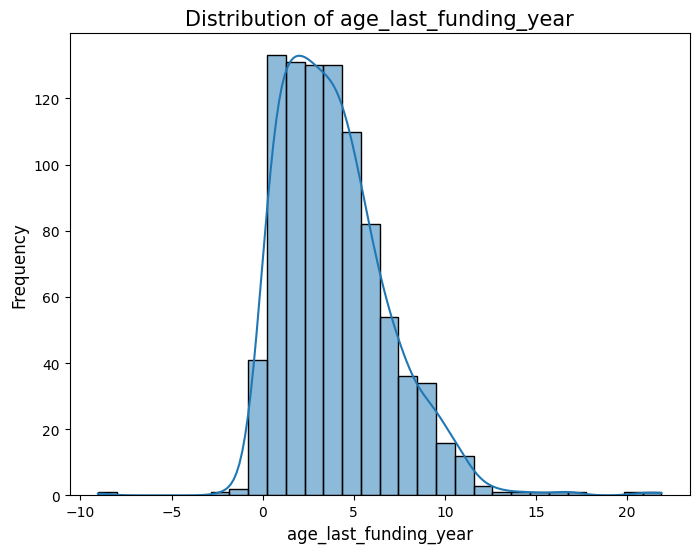

Statistics for age_last_funding_year:
Mean: 3.9314557963163597, Standard Deviation: 2.967909846607269
Skewness: 1.0902997848105946, Kurtosis: 3.132130645440287
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: age_first_milestone_year


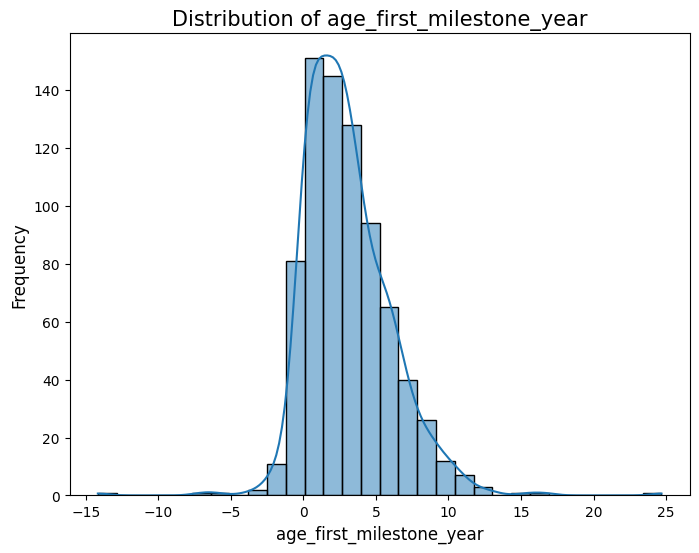

Statistics for age_first_milestone_year:
Mean: 3.055353047989624, Standard Deviation: 2.9770571428977264
Skewness: 0.9426291866430279, Kurtosis: 5.595027875292853
Interpretation:
- Skewness: Approximately symmetric
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: age_last_milestone_year


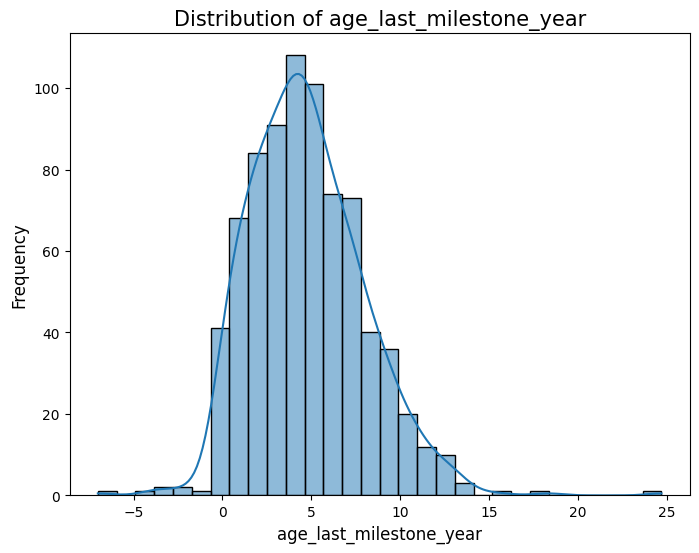

Statistics for age_last_milestone_year:
Mean: 4.754422568093385, Standard Deviation: 3.21210715620923
Skewness: 0.710547953398705, Kurtosis: 2.0589643752416826
Interpretation:
- Skewness: Approximately symmetric
- Kurtosis: Platykurtic (light tails)

Analysis for Numerical Column: relationships


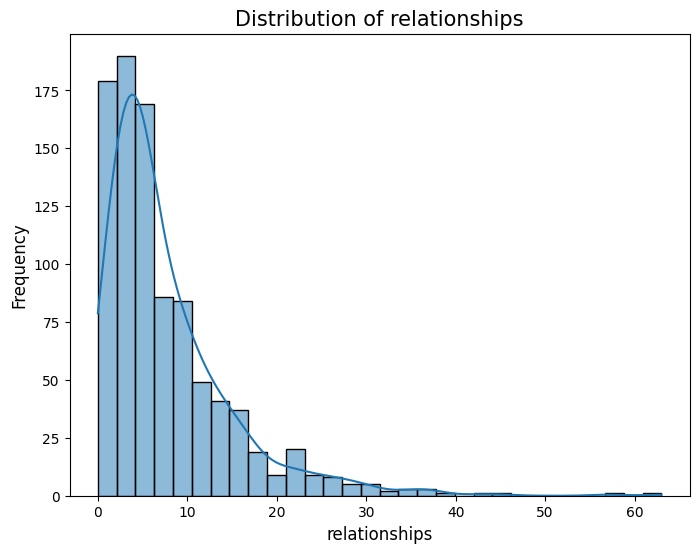

Statistics for relationships:
Mean: 7.710725893824486, Standard Deviation: 7.265776000021263
Skewness: 2.326173012299661, Kurtosis: 8.580884180147281
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: funding_rounds


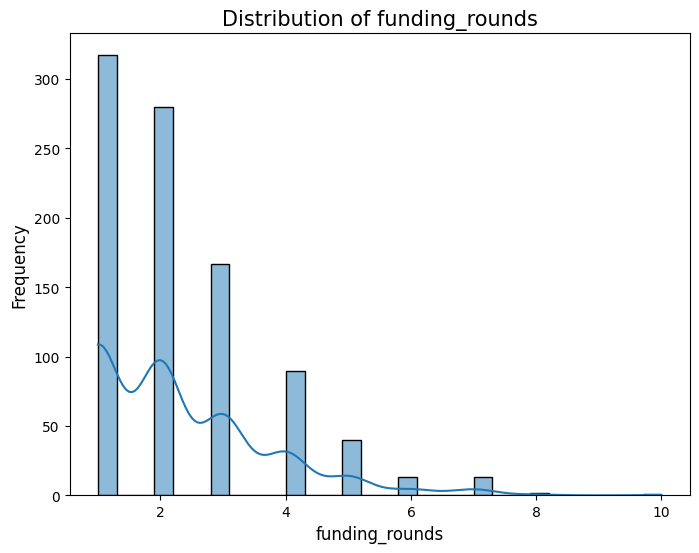

Statistics for funding_rounds:
Mean: 2.3109425785482123, Standard Deviation: 1.3909217125220052
Skewness: 1.3547108901113336, Kurtosis: 2.245763863776274
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Platykurtic (light tails)

Analysis for Numerical Column: funding_total_usd


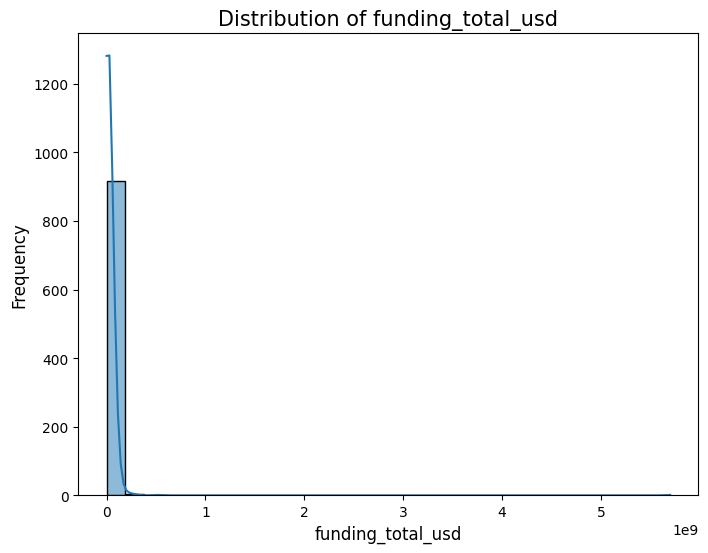

Statistics for funding_total_usd:
Mean: 25419749.09209101, Standard Deviation: 189634364.4887944
Skewness: 29.1050624735019, Kurtosis: 867.6329162424414
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: milestones


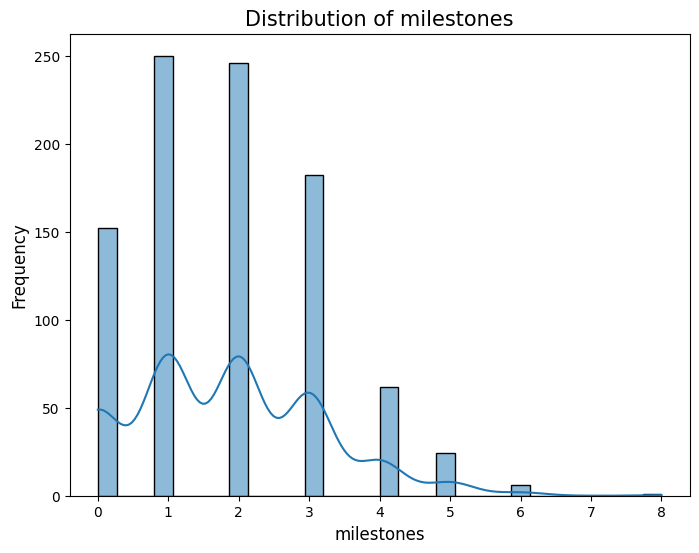

Statistics for milestones:
Mean: 1.8418201516793067, Standard Deviation: 1.322632023165972
Skewness: 0.5764393225408646, Kurtosis: 0.2524248523934771
Interpretation:
- Skewness: Approximately symmetric
- Kurtosis: Platykurtic (light tails)



In [13]:
for col in numerical_columns:
    analyze_numerical(col)

### Date Columns Analysys

In [14]:
#for col in date_columns:
 #   analyze_date(col)


# Multivariate data analysis

In this section, you should plot at least **5 multivariate visualizations**. The key here is to investigate underlying correlations and behaviors within the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **ONE** non-obvious behavior in the data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. Explain why you have selected these specific variables and what you expect to discover through their relationship;
2. Determine what kind of visualization is the most suitable;
3. Report the findings and discuss whether they corroborate or not the aforementioned hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For example, consider applying techniques such as PCA, t-SNE, or even others that we haven't covered in the lectures. The goal is to cultivate a critical mindset toward data analysis and our work.

### Important

It is strictly prohibited to create multivariate visualizations using variables that were not included in the previous section (univariate data analysis).

##Hypothesis 1:

* Question:
Is there any correlation betweeen the funding total amount a startup has received and its business activity? Are tech companies privileged?
* Choosen variables:
is_tech_company (categorical) vs funding_total_usd (numerical)
* Expect do discover:
Did technolgy companies receive more funding (U$)? Are their mean funding bigger than other business categories?
* Kind of visualization:
We ploted two differents bar-plots: one is about 'Funding Distribution Ranges by Tech vs Non-Tech Startups' and the other is about the "Average Investment by Company Type (Tech vs Non-Tech)"
* Report findings:
Tech companies had a bigger mean funding compared to other companies. The funding distribution plot didn't corroborate, but the one about average investment did.



<ipython-input-15-2942738891>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funding_range_by_tech = df.groupby(['is_technology', 'funding_range']).size().reset_index(name='count')


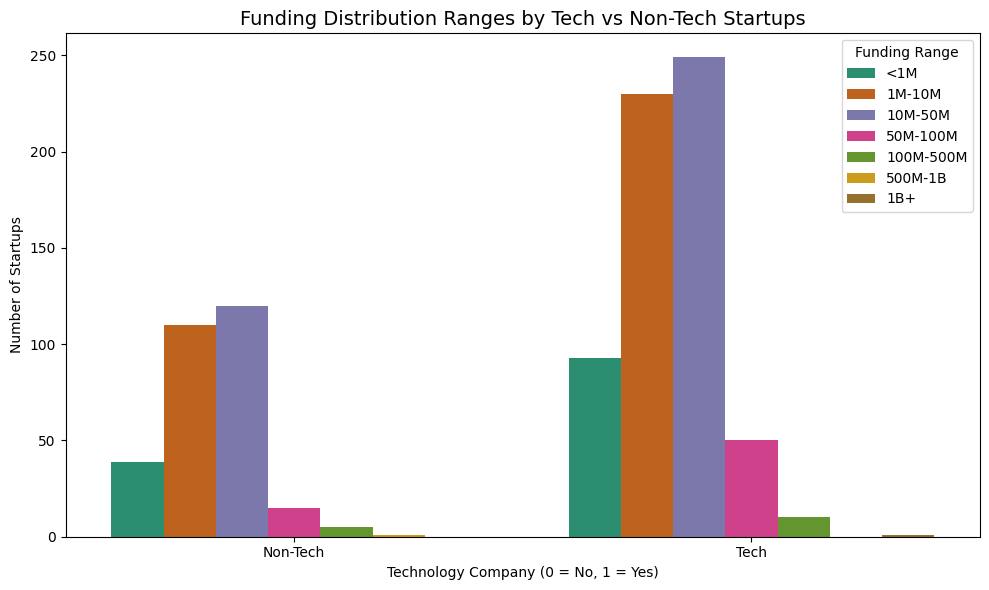

In [15]:
# Contagem de startups por faixa de funding e tipo de empresa (TI ou não)
bins = [0, 1e6, 1e7, 5e7, 1e8, 5e8, 1e9, df['funding_total_usd'].max()]
labels = ['<1M', '1M-10M', '10M-50M', '50M-100M', '100M-500M', '500M-1B', '1B+']

#New column with the range funding
df['funding_range'] = pd.cut(df['funding_total_usd'], bins=bins, labels=labels)
funding_range_by_tech = df.groupby(['is_technology', 'funding_range']).size().reset_index(name='count')


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=funding_range_by_tech, x='is_technology', y='count', hue='funding_range', palette='Dark2')
plt.title('Funding Distribution Ranges by Tech vs Non-Tech Startups', fontsize=14)
plt.xlabel('Technology Company (0 = No, 1 = Yes)')
plt.ylabel('Number of Startups')
plt.xticks([0, 1], ['Non-Tech', 'Tech'])
plt.legend(title='Funding Range')
plt.tight_layout()
plt.show()

<ipython-input-16-2789054677>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='is_technology', y='funding_total_usd', estimator='mean', palette=['#FF6F61', '#6B5B95'])


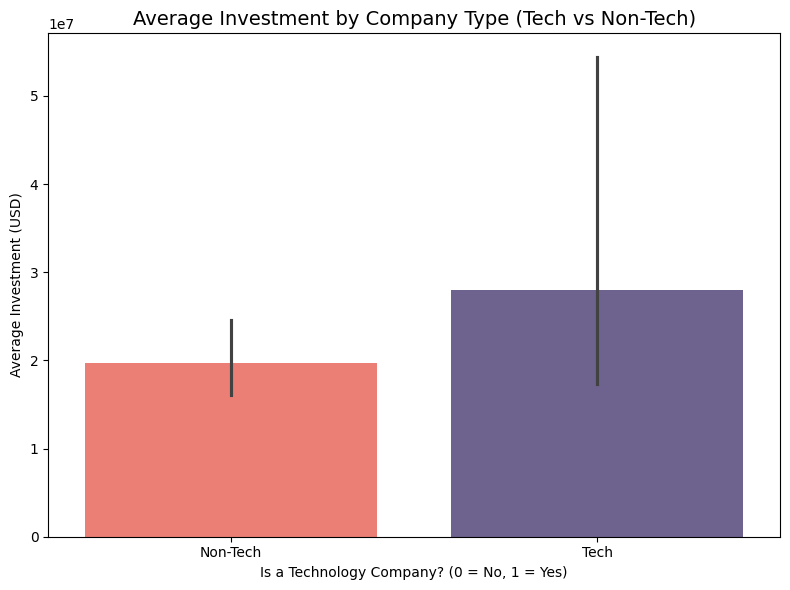

In [16]:
# Create a bar plot showing the average investment by company type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='is_technology', y='funding_total_usd', estimator='mean', palette=['#FF6F61', '#6B5B95'])

plt.title('Average Investment by Company Type (Tech vs Non-Tech)', fontsize=14)
plt.xlabel('Is a Technology Company? (0 = No, 1 = Yes)')
plt.ylabel('Average Investment (USD)')
plt.xticks([0, 1], ['Non-Tech', 'Tech'])
plt.tight_layout()
plt.show()


##Hypothesis 2:
* Question: Are the companies that achieve the first milestone earlier more successfull?
* Choosen variables: age_first_milestone (numerical) vs status (categorical)
* Expect to discover: if a company devoleped very fast, achieving the first milestone early, is that a good or bad thing? Do these companies fail as often as they succeed?
* Kind of visualization: We ploted a boxplot, because we wanna compare the distribution of a numerical variable across different categories and the metrics (outliers and mean for example).
* Report findings: Achieving the first milestone at a young age and having success are not correlated, because the mean is just the same. We also have some outliers that achieved the first milestone after 15 years and were acquired, so these variables aren't correlated.

<ipython-input-17-1744105476>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='age_first_milestone_year', palette='Set2')


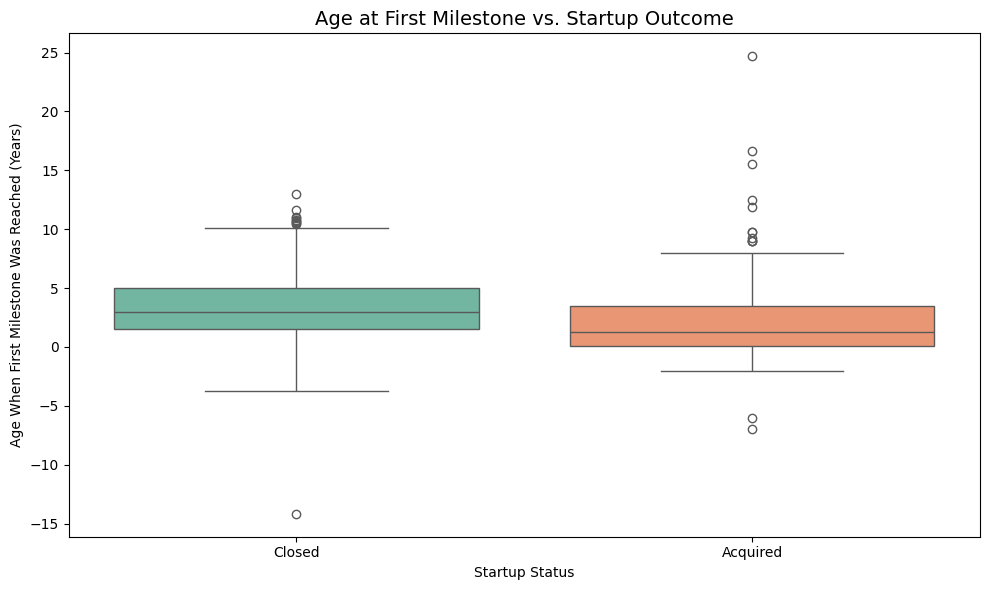

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='age_first_milestone_year', palette='Set2')

plt.title('Age at First Milestone vs. Startup Outcome', fontsize=14)
plt.xlabel('Startup Status')
plt.ylabel('Age When First Milestone Was Reached (Years)')
plt.xticks([0, 1], ['Closed', 'Acquired'])

plt.tight_layout()
plt.show()


##Hypothesis 3:
* Question: Is there any relation between the startup founding/shutdowns and economy crisis? Did it affect technology companies?
* Context: The Dotcom Bubble (2000) led to a sharp decline in internet-based startups due to overvaluation and lack of profitability. Later, the Global Financial Crisis (2008) caused a severe contraction in funding and investment, affecting startups across all sectors. More recently, the COVID-19 pandemic (2020) introduced unprecedented uncertainty, disrupting operations and shifting market dynamics, leading to both new opportunities and widespread closures.
* Choosen variables: closed_at (date) vs founded_at (date). The second chart has a 'is_technology' (categorical) column filter.
* Expected to discover: If the global crisis affected the tech companies, specially the technology ones.
* Kind of visualization: We used sobreposed histrograms.
* Report findings: The global crisis didn't increase the startups shutdowns, but we saw that the years after the 2008 crisis closed more startups than any other crisis and the highest startup closure rate occured in the years following that crisis. The same happenned with tech startups.

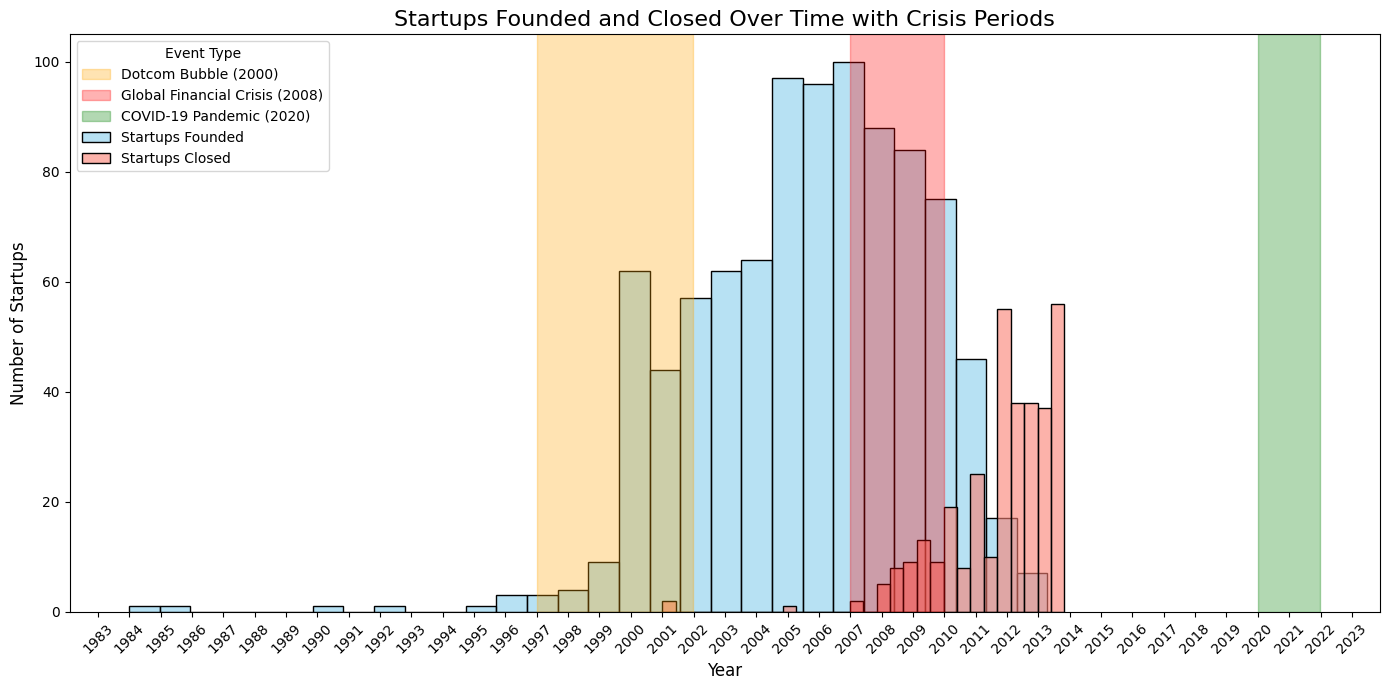

In [18]:

plt.figure(figsize=(14, 7))
sns.histplot(df['founded_at'], kde=False, color='skyblue', label='Startups Founded', bins=30, alpha=0.6)
sns.histplot(df['closed_at'], kde=False, color='salmon', label='Startups Closed', bins=30, alpha=0.6)

# Crisis periods
plt.axvspan(pd.Timestamp('1997-01-01'), pd.Timestamp('2001-12-31'), color='orange', alpha=0.3, label='Dotcom Bubble (2000)')

plt.axvspan(pd.Timestamp('2007-01-01'), pd.Timestamp('2009-12-31'), color='red', alpha=0.3, label='Global Financial Crisis (2008)')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='green', alpha=0.3, label='COVID-19 Pandemic (2020)')

plt.title('Startups Founded and Closed Over Time with Crisis Periods', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.legend(title='Event Type')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


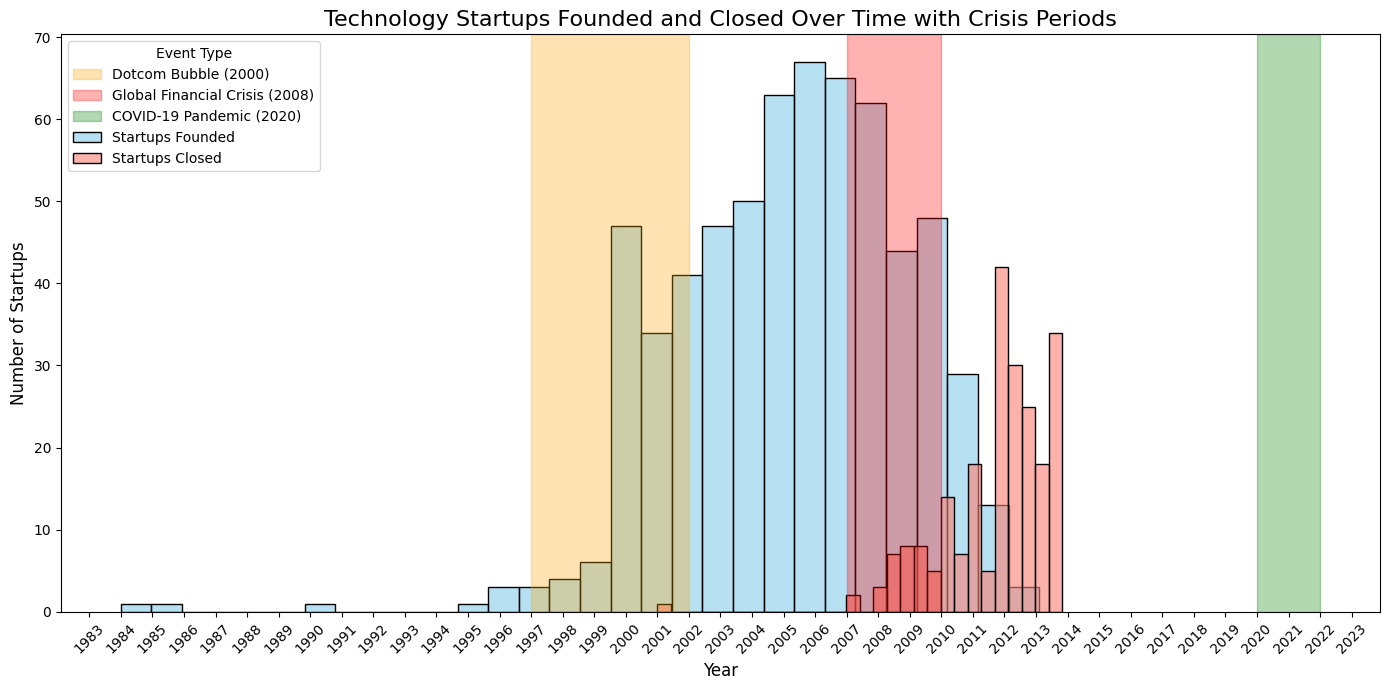

In [19]:
# Plot
plt.figure(figsize=(14, 7))
df_tech_closure = df[df['is_technology'] == 1]
sns.histplot(df_tech_closure['founded_at'], kde=False, color='skyblue', label='Startups Founded', bins=30, alpha=0.6)
sns.histplot(df_tech_closure['closed_at'], kde=False, color='salmon', label='Startups Closed', bins=30, alpha=0.6)

# Crisis periods
plt.axvspan(pd.Timestamp('1997-01-01'), pd.Timestamp('2001-12-31'), color='orange', alpha=0.3, label='Dotcom Bubble (2000)')
plt.axvspan(pd.Timestamp('2007-01-01'), pd.Timestamp('2009-12-31'), color='red', alpha=0.3, label='Global Financial Crisis (2008)')
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='green', alpha=0.3, label='COVID-19 Pandemic (2020)')

plt.title('Technology Startups Founded and Closed Over Time with Crisis Periods', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.legend(title='Event Type')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Hypothesis 4:
* Question: Is there a correlation between the year of the last funding round and the year the startup closed? If the startup stops receiving funding, does it close?
* Choosen variables: last_funding_at (date) vs closed_at (date)
* Expect to discover: Startups tend to fail shortly after they stop receiving investments.
* Kind of visualization: Scatter plot to observe proximity between last funding year and closing year.
* Report findings: The points are very away from the diagonal, so there isn't any correlation.


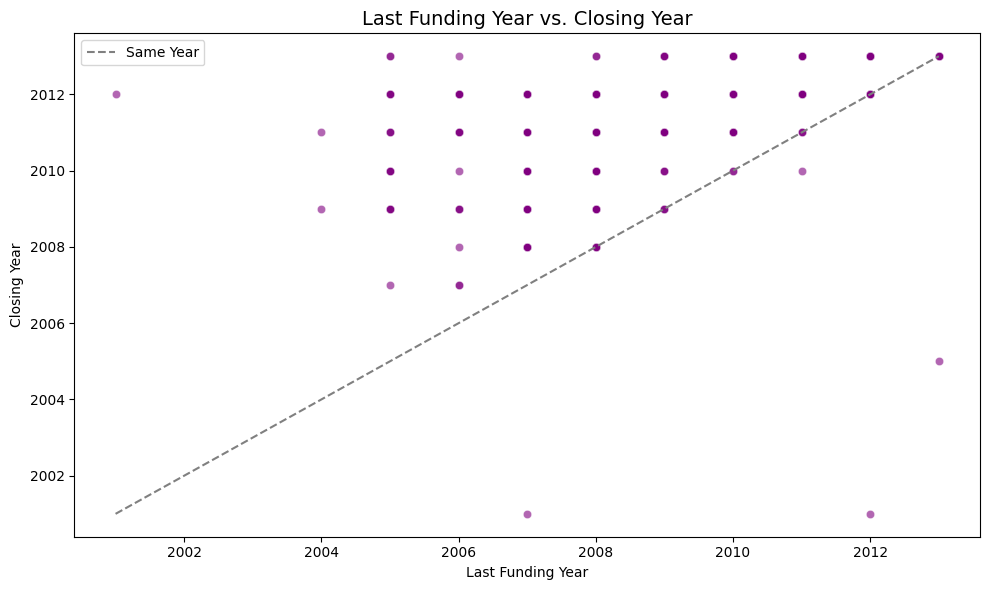

In [20]:
# Preparing data
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')
df_plot = df[['last_funding_at', 'closed_at']].dropna().copy()
df_plot['last_funding_year'] = df_plot['last_funding_at'].dt.year
df_plot['closing_year'] = df_plot['closed_at'].dt.year

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='last_funding_year', y='closing_year', alpha=0.6, color='purple')

# Reference line
plt.plot([df_plot['last_funding_year'].min(), df_plot['last_funding_year'].max()],
         [df_plot['last_funding_year'].min(), df_plot['last_funding_year'].max()],
         linestyle='--', color='gray', label='Same Year')

plt.title('Last Funding Year vs. Closing Year', fontsize=14)
plt.xlabel('Last Funding Year')
plt.ylabel('Closing Year')
plt.legend()
plt.tight_layout()
plt.show()



##Hypothesis 5:
* Question: Did receiving funding earlier in a startup's life relate to longevity?
* Choosen variables: age_first_funding_year (numerical) vs age_at_closing (numerical)
* Expect to discover: Startups that receive their first investment later in their life may have shorter lifespans, or fail faster.
* Kind of visualization: Scatter plot to observe the relationship between age at first funding and age at closing.
* Report findings: There isn't correlation.


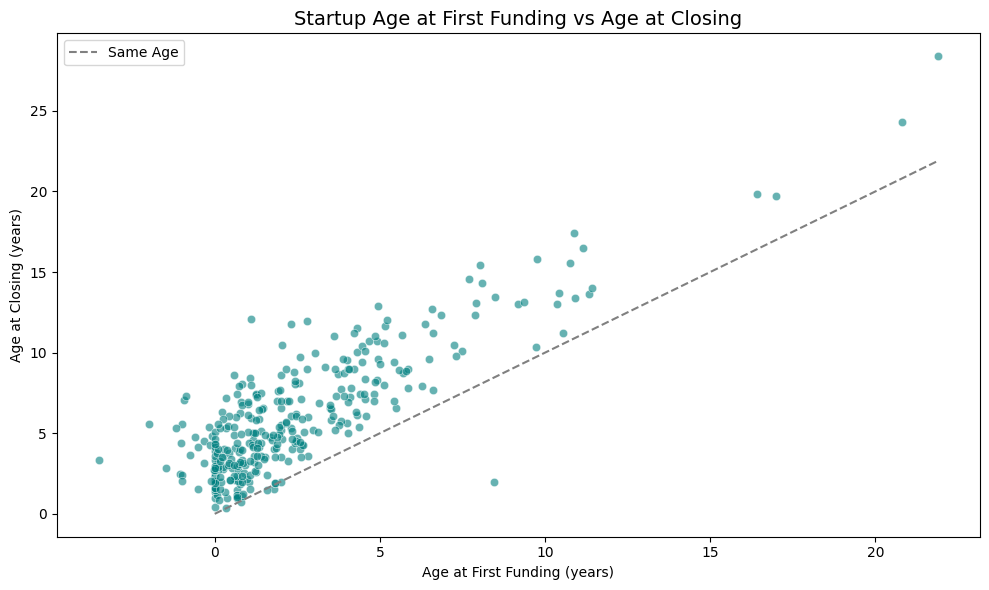

In [21]:

# Remover casos inconsistentes
df_age = df[df['age_at_closing'] > 0]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_age, x='age_first_funding_year', y='age_at_closing', alpha=0.6, color='teal')

# Linha de referência
plt.plot([0, df_age['age_first_funding_year'].max()],
         [0, df_age['age_first_funding_year'].max()],
         linestyle='--', color='gray', label='Same Age')

plt.title('Startup Age at First Funding vs Age at Closing', fontsize=14)
plt.xlabel('Age at First Funding (years)')
plt.ylabel('Age at Closing (years)')
plt.legend()
plt.tight_layout()
plt.show()


# Final Plots (Effective Data Visualization)

In this section, you need to **enhance 3 multivariate visualizations** that were presented in the previous section of the report.
The goal is to enhance these visualizations so that they can be effectively presented to an audience unfamiliar with the dataset or with data analysis.
**Therefore, make sure that their size, colors, textures, and other visual elements are appropriate and convey the intended information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot;
2. Provide a description of the visualization, highlighting the key findings that can be drawn from it.


**Hint**: take a look at the checklist based on Evergreen’s work to ensure your visualizations meet the best practices for clarity and impact.

## First final plot
The enhanced visualization, featuring overlaid histograms, illustrates the temporal distribution of startup foundings and shutdowns—both in general and specifically for technology startups—in relation to major economic crises. Most startups were founded between 2000 and 2013, with a notable spike in shutdowns occurring between 2011 and 2013, particularly following the 2008 financial crisis, indicating a delayed impact. In contrast, the Dotcom Bubble (2000) did not show a clear influence on closure rates within the dataset. The Covid Crisis (20220) also didn't affect the startups because we only have data until 2013. These patterns were also observed among tech startups, suggesting that even this sector, often seen as more resilient, was affected in the years after 2008. Overall, the analysis indicates that among the crises considered, only the 2008 recession had a significant and measurable effect on startup shutdowns, including those in the technology sector.

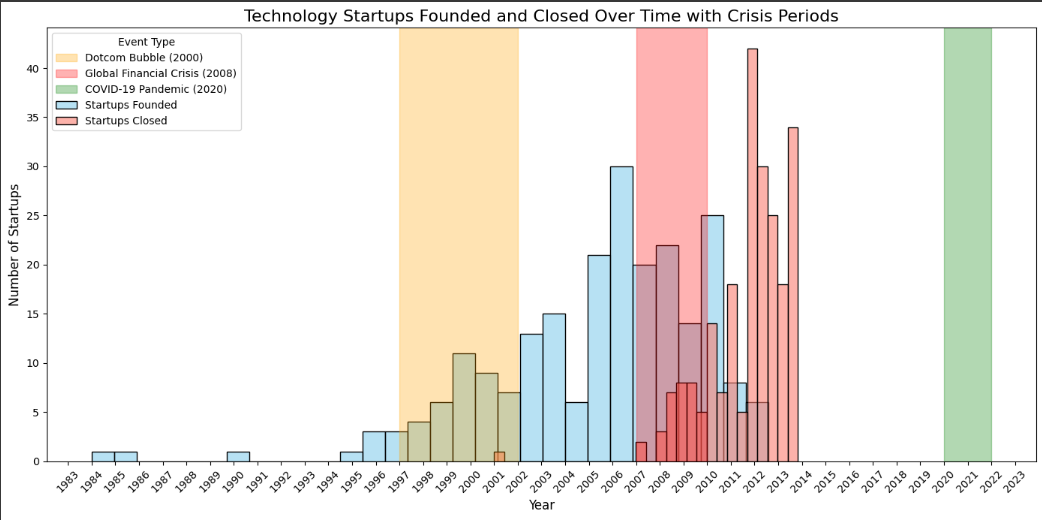

## Second final plot
To evaluate whether achieving the first milestone at a younger company age is associated with greater success, we compared the distribution of the variable age at first milestone across two outcome categories: acquired and closed. A boxplot was used to visualize this relationship, as it effectively highlights distribution, central tendency, and outliers across categorical groups. The results indicate that there is no clear correlation between the timing of the first milestone and the final status of the startup. Both acquired and closed companies shared a similar mean and spread, and notably, some startups that achieved their first milestone after more than 15 years were still acquired. This suggests that reaching early milestones does not necessarily predict success, and that other factors likely play a more significant role in determining a startup’s long-term outcome.
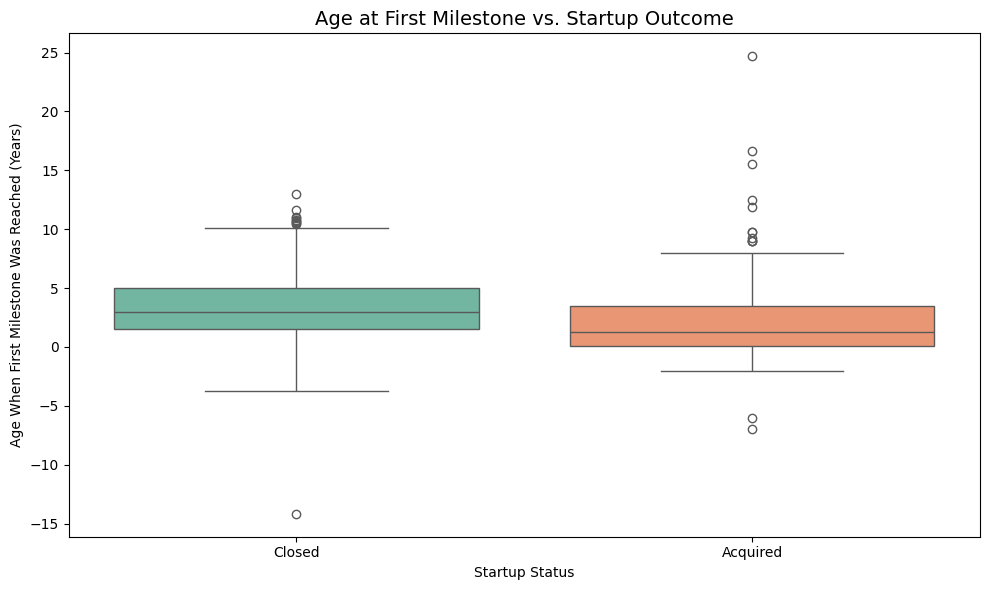









## Third final  plot

To investigate whether technology companies receive more funding than non-tech startups, we analyzed the relationship between company type (tech vs. non-tech) and total funding received (in USD). The analysis showed that tech startups tend to receive higher average funding compared to their non-tech counterparts. This indicates that technology companies are generally more privileged in terms of investment, potentially due to their scalability, innovation-driven models, and the strong interest they attract from investors. Overall, the results support the hypothesis that being a tech company is associated with greater access to financial resources.

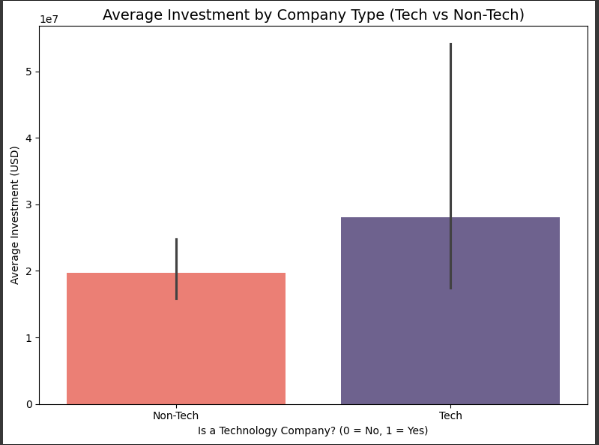

# Digest

In this section you should write down the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2,500 characters (excluding spaces).

#Main Findings of the Exploratory Data Analysis

The dataset under analysis contains information about approximately 900 startups, most of which are located in California and belong to various industries subsectors, specially the technology-related one's. Specifically, around 600 of these companies fall into the tech category, showing a strong regional and sectoral concentration.

The dataset is labeled, with a target class named "status", which can be either acquired or closed. A significant majority of the startups—64.5%—were acquired, while the remaining 35.5% were closed. This suggests that, despite the high-risk nature of startups, a good portion of them reached successful exits.

We analyzed the impact of economic crises on the startups outcomes. Interestingly, most global economic events did not substantially affect these companies, with the exception of the 2008 financial crisis, which appears to have had some measurable impact.

Another key observation is that the majority of startups secured their first round of funding and achieved their first milestone within the first 0 to 5 years of their foundation. This pattern highlights the initial years as a critical period for startup growth and development.

Most of the startups in the dataset were founded between 2000 and 2013, with 2013 being the founding year of the most recent startup. In contrast, a large number of closures occurred between 2011 and 2013.

We also observed that technology startups received a higher average investment compared to those in other sectors, which is consistent with broader industry trends where tech ventures attract more investor interest and capital.

An important insight was related to the correlation—or the lack thereof—between achieving the first milestone early and long-term success. The data shows that reaching a first milestone at a young age is not necessarily associated with a successful outcome, as both acquired and closed startups had similar mean milestone achievement ages. Additionally, some outliers had achieved their first milestone more than 15 years after being founded and were still acquired, further suggesting no strong correlation between these variables.

Similarly, we found no clear correlation between the time of receiving the last investment and whether a startup closed or was acquired. This insight implies that not receiving further investment does not appear to be a decisive factor in a company shutting down.

#Personal Reflection on the Work and Process

Working on this analysis was an engaging experience. It was interesting to uncover patterns and stories behind the data, especially around startup life cycles and investment behavior.

However, I also recognize that the process took longer than necessary, possibly due to over-focusing on some aspects while leaving others underexplored. In hindsight, we could have allocated our time more efficiently.

Additionally, while we did notice the presence of a few outliers, we opted not to treat them, considering their limited number. Looking back, I believe a more thorough treatment of outliers could have enriched our analysis and made our insights a little more robust.

Despite these limitations, we were satisfied with the overall quality of our work and the learning experience it provided. It helped us strengthen our data analysis and critical thinking skills, and now we feel more confident about approaching similar projects in the future and building a good data pipeline.


# Machine Learning Evaluation Strategy

To explore the best modeling configuration for our classification problem, we designed a comprehensive evaluation grid combining:

---

## 1. Models (Estimators)
We tested five widely-used supervised classifiers:

- **Logistic Regression**: a simple linear model suitable for binary tasks.  
- **Random Forest**: a powerful ensemble method that handles non-linearities and feature importance.  
- **Gradient Boosting**: a boosting technique that builds strong predictors from weak learners.  
- **Support Vector Machine (SVM)**: effective in high-dimensional spaces.  
- **K-Nearest Neighbors (KNN)**: a distance-based classifier that is good for small datasets.  

---

## 2. Resampling Techniques  
To deal with class imbalance (2/3 "acquired" vs 1/3 "non-acquired"), we applied:

- **SMOTE** (Synthetic Minority Oversampling Technique): synthetically generates new minority class examples.  
- **RandomUnderSampler**: randomly removes samples from the majority class.  

---

## 3. Feature Selection Methods
To reduce dimensionality and improve generalization:

- **SelectKBest**: selects the top 10 features using ANOVA F-score.  
- **RFE** (Recursive Feature Elimination): recursively removes least important features based on model weights.  

---

## 4. Validation Strategies
To properly evaluate model performance and avoid overfitting:

- **Stratified K-Fold (5 splits)**: ensures class balance across folds; good trade-off between bias and variance.  
- **Leave-One-Out (LOO)**: uses every sample once as validation — ideal for small datasets, though computationally expensive.  

---

## 5. Evaluation Metrics
We computed several performance metrics:

- **F1-Score (weighted)**: balances precision and recall — most relevant in imbalanced contexts.  
- **Accuracy**: overall correct predictions.  
- **Precision**: true positives among predicted positives.  
- **Recall**: true positives among actual positives.  
- **Training Time**: to assess computational cost of each pipeline.  

---

## 6. Pipeline Design
Each configuration was tested inside a pipeline with the following structure:

---

## 7. Combination Grid

Each model was tested with **both resampling techniques**, **both feature selection methods**, and **both validation strategies**, resulting in:

- 5 models × 2 samplers × 2 selectors × 3 validators = **60 unique combinations**

This exhaustive grid allowed us to evaluate the impact of each component on the classification task, providing a robust comparison of performance and computational cost across different machine learning pipelines.


In [22]:
!pip install imbalanced-learn


In [23]:

import pandas as pd
import numpy as np
import time

# MODELOS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# PRÉ-PROCESSAMENTO
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# BALANCEAMENTO
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# AVALIAÇÃO
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score

# ⏱ Desligar avisos irrelevantes
import warnings
warnings.filterwarnings("ignore")

## Target Engineering and Missing Value Treatment

- The `closed_at` column was converted to datetime and used to create a binary target variable `is_closed` (1 = closed, 0 = operating).
- We dropped `closed_at` and `age_at_closing` to avoid redundancy, since the former is now encoded and the latter had too many missing values.
- For milestone-related features (`age_first_milestone_year`, `age_last_milestone_year`), missing values were filled with the column median to preserve numerical distribution without introducing bias.


In [24]:
#counting null values in each column
df.isna().sum()

,0
state_code,0
latitude,0
longitude,0
zip_code,0
id,0
city,0
name,0
labels,0
founded_at,0
closed_at,588


In [25]:
# 1. Ensure 'closed_at' is in datetime format
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')

# 2. Create a binary feature: 1 if the company has closed, 0 otherwise
df['is_closed'] = df['closed_at'].notna().astype(int)

df = df.drop(columns=[
    "state_code",
    "latitude",
    "longitude",
    "zip_code",
    "id",
    "city",
    "name",
    "labels",
    "object_id",
    "category_code",
    "is_software",
    "is_web",
    "is_mobile",
    "is_enterprise",
    "is_advertising",
    "is_gamesvideo",
    "is_ecommerce",
    "is_biotech",
    "is_consulting",
    "is_othercategory",
    "founded_at",
    "last_funding_at",
    "closed_at",
    "age_at_closing"
])

# 4. Fill missing values in milestone age columns with the column median
for col in ['age_first_milestone_year', 'age_last_milestone_year']:
    df[col].fillna(df[col].median(), inplace=True)

# Convert datetime columns to numeric
for col in df.select_dtypes(include='datetime').columns:
    df[col + "_year"] = df[col].dt.year

df.drop(columns=df.select_dtypes(include='datetime').columns, inplace=True)


assert df.isna().sum().sum() == 0, "❌ There are still missing (NaN) values in the DataFrame!"

Rodando: RandomForest | SMOTE | SelectKBest | KFold-5
Rodando: RandomForest | SMOTE | RFE | KFold-5
Rodando: RandomForest | RandomUnderSampler | SelectKBest | KFold-5
Rodando: RandomForest | RandomUnderSampler | RFE | KFold-5
Rodando: KNN | SMOTE | SelectKBest | KFold-5
Rodando: KNN | SMOTE | PCA | KFold-5
Rodando: KNN | RandomUnderSampler | SelectKBest | KFold-5
Rodando: KNN | RandomUnderSampler | PCA | KFold-5
Rodando: SVM | SMOTE | SelectKBest | KFold-5
Rodando: SVM | SMOTE | PCA | KFold-5
Rodando: SVM | RandomUnderSampler | SelectKBest | KFold-5
Rodando: SVM | RandomUnderSampler | PCA | KFold-5
Rodando: LogisticRegression | SMOTE | SelectKBest | KFold-5
Rodando: LogisticRegression | SMOTE | PCA | KFold-5
Rodando: LogisticRegression | RandomUnderSampler | SelectKBest | KFold-5
Rodando: LogisticRegression | RandomUnderSampler | PCA | KFold-5
Rodando: GradientBoost | SMOTE | SelectKBest | KFold-5
Rodando: GradientBoost | SMOTE | RFE | KFold-5
Rodando: GradientBoost | RandomUnderSample

,Modelo,Balanceamento,Seleção,Validação,F1,Accuracy,Precision,Recall,Tempo (s)
0,RandomForest,SMOTE,RFE,KFold-5,0.990287,0.990253,0.990558,0.990253,805.28
1,RandomForest,RandomUnderSampler,SelectKBest,KFold-5,0.990287,0.990253,0.990558,0.990253,1.41
2,RandomForest,RandomUnderSampler,RFE,KFold-5,0.990287,0.990253,0.990558,0.990253,632.37
3,LogisticRegression,RandomUnderSampler,SelectKBest,KFold-5,0.989204,0.989172,0.989412,0.989172,0.63
4,LogisticRegression,SMOTE,SelectKBest,KFold-5,0.989204,0.989172,0.989412,0.989172,1.21
5,RandomForest,SMOTE,SelectKBest,KFold-5,0.989198,0.989166,0.989430,0.989166,9.39
6,GradientBoost,RandomUnderSampler,SelectKBest,KFold-5,0.989198,0.989166,0.989430,0.989166,2.61
7,GradientBoost,SMOTE,RFE,KFold-5,0.987035,0.987009,0.987186,0.987009,1534.82
8,SVM,RandomUnderSampler,SelectKBest,KFold-5,0.985974,0.985922,0.986381,0.985922,1.12
9,GradientBoost,RandomUnderSampler,RFE,KFold-5,0.985948,0.985928,0.986107,0.985928,802.90


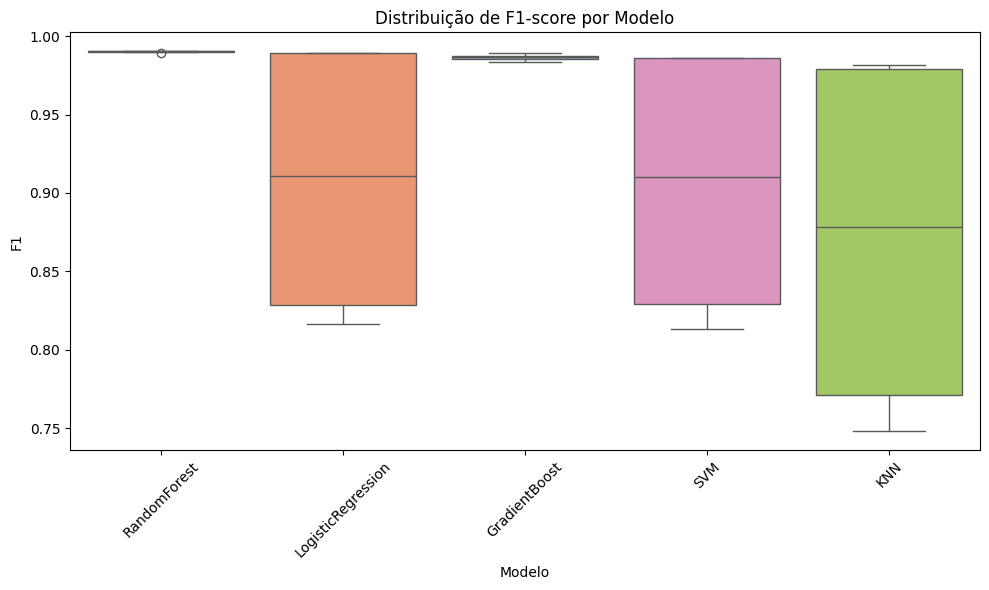

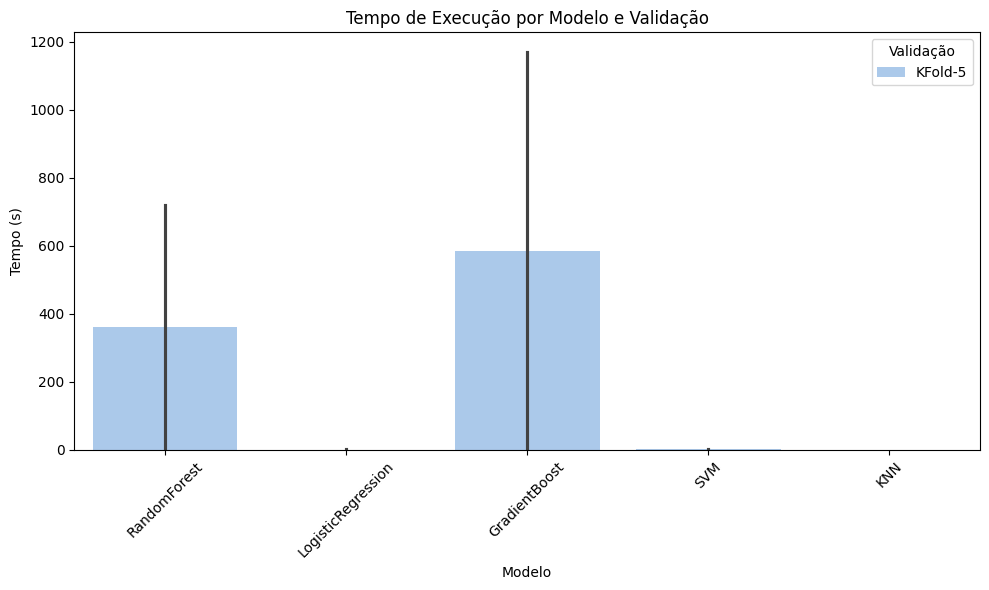

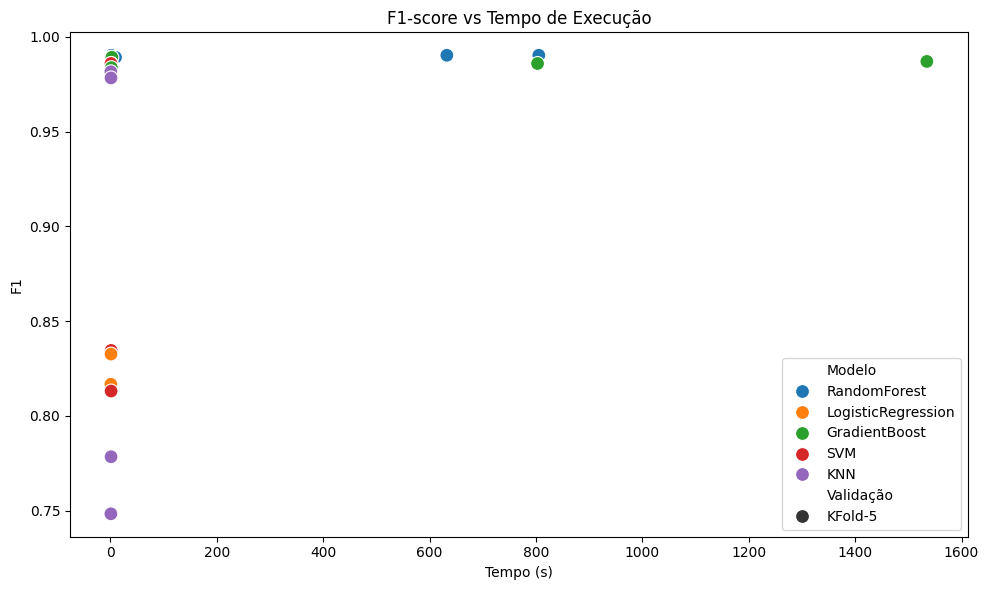

In [30]:
 # Prepare and normalize data
y = df["status"]
X = df.drop(columns=["status"])
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Define models, samplers, selectors and validators
models = {
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "GradientBoost": GradientBoostingClassifier()
}

samplers = {
    "SMOTE": SMOTE(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42)
}
validators = {
    "KFold-5": StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    #"KFold-10": StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    #"Repeated-5x3": RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    #"LOO": LeaveOneOut()  # Foi ineficiente
}

def get_selector(name, model):
    if name == "SelectKBest":
        return SelectKBest(score_func=f_classif, k=10)
    elif name == "RFE":
        return RFE(estimator=model, n_features_to_select=10)
    elif name == "PCA":
        return PCA(n_components=10)

scoring = {
    "f1": make_scorer(f1_score, average="weighted"),
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted")
}

# Execute the 60 combinations to evaluate them after that
results = []

for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():
        for selector_name in ["SelectKBest", "RFE", "PCA"]:
            if selector_name == "RFE" and model_name in ["KNN", "SVM", "LogisticRegression"]:
                continue
            if selector_name == "PCA" and model_name in ["RandomForest", "GradientBoost"]:
                continue  # PCA pode prejudicar modelos baseados em árvores que não se beneficiam de componentes lineares

            selector = get_selector(selector_name, model)
            for val_name, validator in validators.items():
                print(f"Rodando: {model_name} | {sampler_name} | {selector_name} | {val_name}")

                pipeline = Pipeline(steps=[
                    ("sampler", sampler),
                    ("scaler", StandardScaler()),
                    ("selector", selector),
                    ("clf", model)
                ])

                start = time.time()
                scores = cross_validate(
                    pipeline,
                    X,
                    y_encoded,
                    cv=validator,
                    scoring=scoring,
                    n_jobs=-1,
                    error_score="raise"
                )
                end = time.time()

                results.append({
                    "Modelo": model_name,
                    "Balanceamento": sampler_name,
                    "Seleção": selector_name,
                    "Validação": val_name,
                    "F1": np.mean(scores["test_f1"]),
                    "Accuracy": np.mean(scores["test_accuracy"]),
                    "Precision": np.mean(scores["test_precision"]),
                    "Recall": np.mean(scores["test_recall"]),
                    "Tempo (s)": round(end - start, 2)
                })

                pd.DataFrame(results).to_csv("resultados_intermediarios.csv", index=False)
# Five us a final table wit the results
df_results = pd.DataFrame(results).sort_values(by="F1", ascending=False).reset_index(drop=True)
display(df_results)

# Graphics

# F1 by model
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_results, x="Modelo", y="F1", palette="Set2")
plt.title("Distribuição de F1-score por Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time by model
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="Modelo", y="Tempo (s)", hue="Validação", palette="pastel")
plt.title("Tempo de Execução por Modelo e Validação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 vs time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_results, x="Tempo (s)", y="F1", hue="Modelo", style="Validação", s=100)
plt.title("F1-score vs Tempo de Execução")
plt.tight_layout()
plt.show()

# Tratamentos dos dados de resultados

In [38]:
# Arredondar métricas para 2 casas decimais

df_results = df_results.sort_values(by="Tempo (s)").reset_index(drop=True)
df_results[["F1", "Accuracy", "Precision", "Recall", "Tempo (s)"]] = df_results[["F1", "Accuracy", "Precision", "Recall", "Tempo (s)"]].round(2)

display(df_results)

# Adicionar ranking por F1-score
df_results["Ranking_F1"] = df_results["F1"].rank(ascending=False, method="min").astype(int)

# Reordenar colunas
df_results = df_results.sort_values(by="F1", ascending=False).reset_index(drop=True)
df_results = df_results[["Ranking_F1", "Modelo", "Balanceamento", "Seleção", "Validação", "F1", "Accuracy", "Precision", "Recall", "Tempo (s)"]]

# Mostrar top 5
display(df_results.head(5))


,Ranking_F1,Modelo,Balanceamento,Seleção,Validação,F1,Accuracy,Precision,Recall,Tempo (s)
0,1,LogisticRegression,RandomUnderSampler,SelectKBest,KFold-5,0.99,0.99,0.99,0.99,0.63
1,12,KNN,RandomUnderSampler,SelectKBest,KFold-5,0.98,0.98,0.98,0.98,0.72
2,20,KNN,RandomUnderSampler,PCA,KFold-5,0.75,0.75,0.76,0.75,0.75
3,17,LogisticRegression,RandomUnderSampler,PCA,KFold-5,0.82,0.81,0.82,0.81,0.76
4,12,KNN,SMOTE,SelectKBest,KFold-5,0.98,0.98,0.98,0.98,0.94
5,1,SVM,SMOTE,SelectKBest,KFold-5,0.99,0.99,0.99,0.99,0.95
6,15,LogisticRegression,SMOTE,PCA,KFold-5,0.83,0.83,0.83,0.83,0.98
7,19,KNN,SMOTE,PCA,KFold-5,0.78,0.79,0.78,0.79,1.06
8,1,SVM,RandomUnderSampler,SelectKBest,KFold-5,0.99,0.99,0.99,0.99,1.12
9,18,SVM,RandomUnderSampler,PCA,KFold-5,0.81,0.81,0.82,0.81,1.16


,Ranking_F1,Modelo,Balanceamento,Seleção,Validação,F1,Accuracy,Precision,Recall,Tempo (s)
0,1,LogisticRegression,RandomUnderSampler,SelectKBest,KFold-5,0.99,0.99,0.99,0.99,0.63
1,1,LogisticRegression,SMOTE,SelectKBest,KFold-5,0.99,0.99,0.99,0.99,1.21
2,1,SVM,RandomUnderSampler,SelectKBest,KFold-5,0.99,0.99,0.99,0.99,1.12
3,1,SVM,SMOTE,SelectKBest,KFold-5,0.99,0.99,0.99,0.99,0.95
4,1,GradientBoost,SMOTE,RFE,KFold-5,0.99,0.99,0.99,0.99,1534.82


# Machine Learning Results Final Discussion

## Context: Class Imbalance
The target variable status is imbalanced: approximately 66% of instances belong to one class (e.g., "active") and 34% to another (e.g., "closed").
With only 923 instances, this imbalance significantly affects evaluation metrics — simple metrics like accuracy can be misleading.

Evaluation Metrics and Rationale
1. F1-score (weighted)
Why important: Harmonic mean of precision and recall, penalizes class imbalance and extreme errors.

Why weighted: Accounts for class distribution, giving balanced importance to both majority and minority classes.

Conclusion: The most appropriate metric in this case, as it balances performance across unequal classes.

2. Accuracy
Limitation: Can be misleading in imbalanced datasets (e.g., always predicting the majority class still gives 66% accuracy).

Conclusion: Should be used only as a supplementary reference, not in isolation.

3. Precision (weighted)
What it measures: Among predicted positives, how many were actually correct.

Use case: Important when false positives are costly, e.g., predicting a failed startup as active.

Conclusion: Useful when it's better to miss than to falsely detect.

4. Recall (weighted)
What it measures: Among actual positives, how many the model correctly identified.

Use case: Important when false negatives are risky, e.g., missing failed startups.

Conclusion: Ideal for evaluating model sensitivity to the minority class.

5. Execution Time
Why included: Crucial in real-world scenarios where time efficiency matters.

Conclusion: Helps choose between models with similar predictive performance but different computational costs.

## Worst Combinations (Computational Efficiency)
The worst combinations in terms of execution time were those that used the RFE (Recursive Feature Elimination) feature selection method with heavier models, especially RandomForest and GradientBoost.

Examples:

RandomForest + RandomUnderSampler + RFE → F1 = 0.99, Time = 632.37s

GradientBoost + RandomUnderSampler + RFE → F1 = 0.99, Time = 802.90s

RandomForest + SMOTE + RFE → F1 = 0.99, Time = 805.28s

GradientBoost + SMOTE + RFE → F1 = 0.99, Time = 1534.00s

Despite the high scores in F1, Accuracy, Precision, and Recall, these combinations were clearly inefficient, making the use of RFE unfeasible in this context — especially for larger datasets.

## Best Combinations (Performance + Efficiency)
The best combinations considering both performance and execution time were:

LogisticRegression + RandomUnderSampler + SelectKBest → F1 = 0.99, Time = 0.63s

KNN + RandomUnderSampler + SelectKBest → F1 = 0.98, Time = 0.72s

These combinations delivered top-tier performance (F1, Accuracy, Precision, Recall all around 0.98–0.99) with extremely low computational cost. This confirms that simple and efficient pipelines can outperform complex ones in practice.

## Worst Combinations (Classification Metrics)
The combinations that used PCA (Principal Component Analysis) for feature selection showed the lowest scores in all classification metrics:

KNN + RandomUnderSampler + PCA → F1 = 0.75, Accuracy = 0.75, Time = 0.75s

LogisticRegression + RandomUnderSampler + PCA → F1 = 0.82, Accuracy = 0.81, Time = 0.76s

KNN + SMOTE + PCA → F1 = 0.78, Accuracy = 0.79, Time = 1.06s

These results indicate that PCA significantly reduced the predictive performance. PCA performs a linear projection, which may remove important non-linear or distance-based relationships, affecting models like KNN and Logistic Regression.

## Other Combinations
All other combinations performed satisfactorily:

F1-score, Accuracy, Precision, and Recall above 0.98

Execution time below 10 seconds

Excluding the combinations involving RFE with heavy models and those using PCA, the rest of the configurations showed robust and efficient behavior.


## Next Steps
As next steps, we recommend:

Testing other cross-validation strategies, such as:

KFold-10

RepeatedStratifiedKFold

StratifiedShuffleSplit

Performing hyperparameter tuning on the best-performing pipelines.

## Conclusion
Simple pipelines like:

SelectKBest + RandomUnderSampler

Provided the best trade-off between classification performance and computational efficiency.

On the other hand:

RFE and PCA should be avoided in this context due to high cost and/or lower predictive performance.